In [1]:
import pandas as pd

In [2]:
# Define the file paths and the column you want to read from each file
files_column = {
    "dataset_facebook-hashtag-scraper_2024-06-20_10-22-50-332.csv" : 'text',
    "dataset_instagram-hashtag-scraper_2024-06-20_10-45-17-266.csv" : 'caption',
    "dataset_tiktok-hashtag-scraper_2024-06-20_10-28-22-888.csv" : 'text',
    "dataset_instagram-hashtag-scraper_2024-06-20_10-35-36-843.csv" : 'caption',
    "dataset_tiktok-hashtag-scraper_2024-06-20_10-32-44-129.csv" : 'text',
    "dataset_tweet-scraper_2024-06-20_09-25-50-429.csv" : 'text',
    "dataset_tweet-scraper_2024-06-20_09-27-16-304.csv" : 'text',
    "dataset_tweet-scraper_2024-06-20_09-30-14-164.csv" : 'text',
    "dataset_tweet-scraper_2024-06-20_09-30-43-533.csv" : 'text'
}

In [3]:
# Initialize an empty list to store the data
combined_data = []

In [4]:
# Iterate over the files and column, read the specified column, and append the data to the list
for file, column in files_column.items():
    df = pd.read_csv(file, usecols=[column])
    combined_data.extend(df[column].tolist())

In [5]:
# Create a DataFrame from the combined data
combined_df = pd.DataFrame(combined_data, columns=['All_posts'])

In [6]:
# Display the combined DataFrame
print(combined_df)

                                              All_posts
0     There’s no range anxiety with the BYD ATTO 3! ...
1     Fisker Inc. is an American automotive company ...
2     People who drive electric vehicles \n\n#comedy...
3     Say goodbye to conventional steering wheels an...
4     Rear-view camera with flipping logo in the Mer...
...                                                 ...
4458  ¡Hoy es el día! No te pierdas este webinar, en...
4459  RT @AlliTorban: I’m so excited to join the boo...
4460  This starts tomorrow! #Denodo is delighted to ...
4461  RT @CohenTodd81411: Developers work hard to cr...
4462  RT @CohenTodd81411: Download this solution bri...

[4463 rows x 1 columns]


In [7]:
#All the posts need to be in string type in order to be processed later
combined_df['All_posts']= combined_df['All_posts'].astype(str)


In [8]:
combined_df

,All_posts
0,There’s no range anxiety with the BYD ATTO 3! ...
1,Fisker Inc. is an American automotive company ...
2,People who drive electric vehicles \n\n#comedy...
3,Say goodbye to conventional steering wheels an...
4,Rear-view camera with flipping logo in the Mer...
...,...
4458,"¡Hoy es el día! No te pierdas este webinar, en..."
4459,RT @AlliTorban: I’m so excited to join the boo...
4460,This starts tomorrow! #Denodo is delighted to ...
4461,RT @CohenTodd81411: Developers work hard to cr...


In [9]:
combined_df['lower'] = combined_df['All_posts'].apply(lambda x: " ".join(x.lower()  for x in x.split()))
combined_df

,All_posts,lower
0,There’s no range anxiety with the BYD ATTO 3! ...,there’s no range anxiety with the byd atto 3! ...
1,Fisker Inc. is an American automotive company ...,fisker inc. is an american automotive company ...
2,People who drive electric vehicles \n\n#comedy...,people who drive electric vehicles #comedyvide...
3,Say goodbye to conventional steering wheels an...,say goodbye to conventional steering wheels an...
4,Rear-view camera with flipping logo in the Mer...,rear-view camera with flipping logo in the mer...
...,...,...
4458,"¡Hoy es el día! No te pierdas este webinar, en...","¡hoy es el día! no te pierdas este webinar, en..."
4459,RT @AlliTorban: I’m so excited to join the boo...,rt @allitorban: i’m so excited to join the boo...
4460,This starts tomorrow! #Denodo is delighted to ...,this starts tomorrow! #denodo is delighted to ...
4461,RT @CohenTodd81411: Developers work hard to cr...,rt @cohentodd81411: developers work hard to cr...


In [10]:
import string
string.punctuation

#Remove punctuation using string module
combined_df.lower.apply(lambda x:''.join(i for i in x if i not in string.punctuation))

0       there’s no range anxiety with the byd atto 3 w...
1       fisker inc is an american automotive company f...
2       people who drive electric vehicles comedyvideo...
3       say goodbye to conventional steering wheels an...
4       rearview camera with flipping logo in the merc...
                              ...                        
4458    ¡hoy es el día no te pierdas este webinar en e...
4459    rt allitorban i’m so excited to join the book ...
4460    this starts tomorrow denodo is delighted to be...
4461    rt cohentodd81411 developers work hard to crea...
4462    rt cohentodd81411 download this solution brief...
Name: lower, Length: 4463, dtype: object

In [11]:
#Next we remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
allstopwords = stopwords.words('english')
combined_df.lower.apply(lambda x: " ".join(i for i in x.split() if i not in allstopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Konstantinos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       there’s range anxiety byd atto 3! whopping ran...
1       fisker inc. american automotive company founde...
2       people drive electric vehicles #comedyvideos #...
3       say goodbye conventional steering wheels hello...
4       rear-view camera flipping logo mercedes cle co...
                              ...                        
4458    ¡hoy es el día! te pierdas este webinar, en el...
4459     rt @allitorban: i’m excited join book club!!!🥰🥰🥰
4460    starts tomorrow! #denodo delighted silver spon...
4461    rt @cohentodd81411: developers work hard creat...
4462    rt @cohentodd81411: download solution brief di...
Name: lower, Length: 4463, dtype: object

In [12]:
#Next we perform a spelling correction
from textblob import TextBlob
#combined_df['lower'].apply(lambda x: str(TextBlob(x).correct()))

In [13]:
#Tokenisation
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
mystring = "My favorite animal is cat"
nltk.word_tokenize(mystring)
mystring.split(" ")

import nltk
from nltk.stem import PorterStemmer
st = PorterStemmer()
combined_df['lower'].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Konstantinos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Konstantinos\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Konstantinos\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0       there’ no rang anxieti with the byd atto 3! wi...
1       fisker inc. is an american automot compani fou...
2       peopl who drive electr vehicl #comedyvideo #ev...
3       say goodby to convent steer wheel and hello to...
4       rear-view camera with flip logo in the merced ...
                              ...                        
4458    ¡hoy es el día! no te pierda est webinar, en e...
4459    rt @allitorban: i’m so excit to join the book ...
4460    thi start tomorrow! #denodo is delight to be a...
4461    rt @cohentodd81411: develop work hard to creat...
4462    rt @cohentodd81411: download thi solut brief a...
Name: lower, Length: 4463, dtype: object

In [14]:
#Lemmatization
from textblob import Word
combined_df['lower'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

0       there’s no range anxiety with the byd atto 3! ...
1       fisker inc. is an american automotive company ...
2       people who drive electric vehicle #comedyvideo...
3       say goodbye to conventional steering wheel and...
4       rear-view camera with flipping logo in the mer...
                              ...                        
4458    ¡hoy e el día! no te pierdas este webinar, en ...
4459    rt @allitorban: i’m so excited to join the boo...
4460    this start tomorrow! #denodo is delighted to b...
4461    rt @cohentodd81411: developer work hard to cre...
4462    rt @cohentodd81411: download this solution bri...
Name: lower, Length: 4463, dtype: object

In [15]:
#Check the frequency
all_words = []
for sentence in combined_df['lower']:
    all_words.extend(sentence.split())

nltk.FreqDist(all_words)


FreqDist({'the': 5013, 'and': 3328, 'to': 3191, '#ev': 2364, 'a': 2290, '#electricvehicles': 2287, 'of': 2111, 'in': 2024, 'for': 1763, 'electric': 1495, ...})

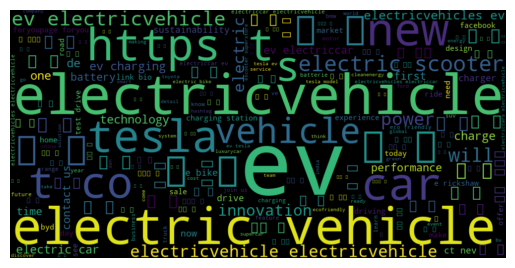

In [16]:
#Create word cloud picture
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
words = []
for message in combined_df['lower']:
    words.extend([word for word in message.split() if word not in STOPWORDS])

wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
#Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
combined_df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in combined_df['lower']]
combined_df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in combined_df['lower']]
combined_df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in combined_df['lower']]
combined_df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in combined_df['lower']]

In [18]:
combined_df


,All_posts,lower,compound,neg,neu,pos
0,There’s no range anxiety with the BYD ATTO 3! ...,there’s no range anxiety with the byd atto 3! ...,0.2486,0.062,0.862,0.076
1,Fisker Inc. is an American automotive company ...,fisker inc. is an american automotive company ...,0.6249,0.000,0.955,0.045
2,People who drive electric vehicles \n\n#comedy...,people who drive electric vehicles #comedyvide...,0.0000,0.000,1.000,0.000
3,Say goodbye to conventional steering wheels an...,say goodbye to conventional steering wheels an...,0.0000,0.000,1.000,0.000
4,Rear-view camera with flipping logo in the Mer...,rear-view camera with flipping logo in the mer...,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...
4458,"¡Hoy es el día! No te pierdas este webinar, en...","¡hoy es el día! no te pierdas este webinar, en...",-0.7088,0.087,0.896,0.017
4459,RT @AlliTorban: I’m so excited to join the boo...,rt @allitorban: i’m so excited to join the boo...,0.9824,0.000,0.375,0.625
4460,This starts tomorrow! #Denodo is delighted to ...,this starts tomorrow! #denodo is delighted to ...,0.8353,0.000,0.920,0.080
4461,RT @CohenTodd81411: Developers work hard to cr...,rt @cohentodd81411: developers work hard to cr...,0.4404,0.057,0.769,0.174


In [19]:
s1 = combined_df.loc[:, 'neg'].mean()
s2 = combined_df.loc[:, 'neu'].mean()
s3 = combined_df.loc[:, 'pos'].mean()


In [20]:
print(s1)
print(s2)
print(s3)

0.01990141160654268
0.896581223392337
0.08351086712973337


In [21]:
s3/s1

np.float64(4.196228326953389)